# Dip

Concerned only on if we've reached the bottom of a short-term dip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.trend import SMAIndicator

In [93]:
# Temporary solution
import sys
sys.path.insert(0, '../analysis-features')
import useful_functions as uf

In [94]:
df = pd.read_csv("../data/BTCUSDT-hour.csv")

In [96]:
def get_target(df, span=200, gain_req=1.1):
    """returns 1 if is a dip"""
    acc = list(np.zeros(span, dtype=int))
    df_len = len(df["close"])
    for i in range(span, len(df["close"])-span, 1):
        close = df["close"].iloc[i]
        dip_range = df[i-span:i+span].close
        if min(dip_range)*gain_req >= close and max(df[i:i+span].close)>=close*gain_req:
            acc.append(1)
        else:
            acc.append(0)
    acc = acc + list(np.zeros(span, dtype=int))

    return acc

In [97]:
df["target"] = get_target(df.copy(), span=50, gain_req=1.1)

In [98]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,target
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,1.509525e+05,7887.635513,0
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,9.260828e+04,8039.262402,0
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,2.079532e+04,8041.760498,0
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,1.129135e+04,8048.127886,0
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,3.552747e+03,8018.036500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32885,2021-05-23 09:00:00,34376.00,35300.00,33925.18,34202.58,13905.215271,1621763999999,4.804456e+08,248349,6930.347913,2.395218e+08,0.000000,0
32886,2021-05-23 10:00:00,34207.02,35822.21,34118.72,35004.81,9389.783513,1621767599999,3.293869e+08,179166,4687.146563,1.644107e+08,0.000000,0
32887,2021-05-23 11:00:00,35004.82,35800.00,34600.00,35389.10,6744.387033,1621771199999,2.381694e+08,129096,3263.463404,1.152461e+08,0.000000,0
32888,2021-05-23 12:00:00,35386.80,35800.00,33118.93,33944.77,17222.705813,1621774799999,5.928686e+08,297192,7952.349708,2.739512e+08,0.000000,0


In [99]:
df.to_csv("../data/BTCUSDT-hour-target.csv", index=False)

In [81]:
df["scatter_results"] = list(map(lambda x, c: c if x == 1 else None, df["target"], df["close"]))

In [90]:
dp = df[28000:30000]

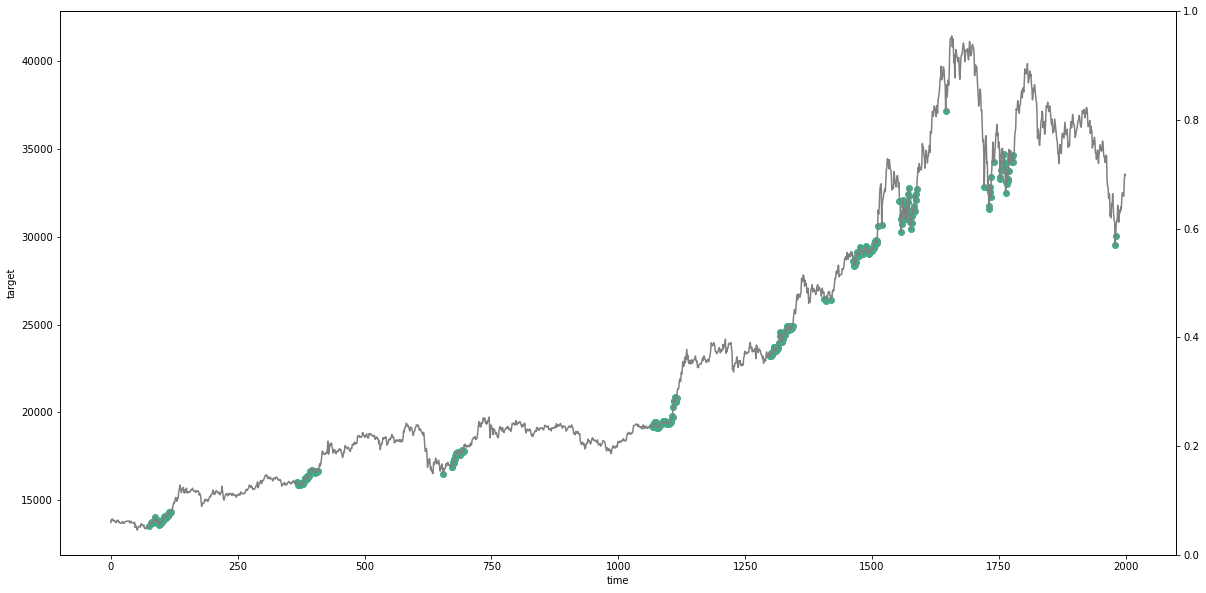

In [91]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.scatter(range(len(dp)),
        dp.scatter_results,
        color="#43aa8b")
# ax.axhline(y=0, color='darkgreen', linestyle='-')
ax.set_xlabel("time")
ax.set_ylabel("target")

# ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax.plot(range(len(dp)),
         dp.close,
         color="grey")

# ax.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()